# Aug ??st, 2021 (play svinet)

**Motivation**: SVINET <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
mice = Mice(Config(128))
mice.combine_dfs('both', full=True)

key = 'sub-SLC07_ses-1' # 'sub-SLC02_ses-2' # 'sub-SLC'
mode = 'bold'
metric = 'pearson'
match_metric = 'cosine'

## New (p00)

current expt: 'p20'

[PROGRESS] experiment loaded: 'p20',  total # runs:  994

[PROGRESS] some runs were excluded:     6 x k = 4

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

  0%|          | 0/1 [00:00<?, ?it/s]

[PROGRESS] find best mappings: done

[PROGRESS] results aligned: done

  0%|          | 0/994 [00:00<?, ?it/s]

[PROGRESS] membership df: done

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_08)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_08)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_08)

  0%|          | 0/100 [00:00<?, ?it/s]

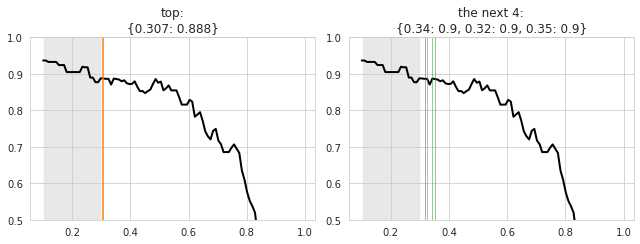

[PROGRESS] process results: done

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_
08)/render/overlap_cortex_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_
08)/render/disjoint_cortex_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_
08)/render/overlap_brain_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_ses-1_n128/p20/k5-cosine-linksampling-(2021_08_
08)/render/disjoint_brain_k5.html

[PROGRESS] fit: done!

00 - 00:02:53  (dd - hh:mm:ss)

In [4]:
k = 5
p = 20

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=key,
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    graph_type='real',
    verbose=True,
).load_runs().fit_svinet()
convert_time(time()-start)

current expt: 'p20'

[PROGRESS] loading 'k5-cosine-linksampling-(2021_08_08)' from
'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/b
old_pearson_task-rest_sub-SLC07_ses-1_n128/p20'

  0%|          | 0/100 [00:00<?, ?it/s]

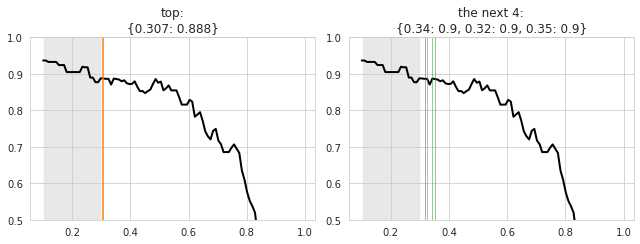

[PROGRESS] process results: done

[PROGRESS] 994 results loaded

00 - 00:00:19  (dd - hh:mm:ss)

In [6]:
k = 5
p = 20

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=key,
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    graph_type='real',
    verbose=True,
).load_results(full_process=True)
convert_time(time()-start)

In [7]:
_ = svinet.plot_memberships('bar', show=False, save=True)
_ = svinet.plot_memberships('box', show=False, save=True)
_ = svinet.plot_memberships('box-strip', show=False, save=True, size=5, alpha=0.1)

In [8]:
_ = svinet.plot_memberships('box-strip', show=False, save=True, size=5, alpha=0.1)

In [9]:
bins = []
n_cuts = len(svinet.pi_cut_df) / len(svinet.get_result_dict()) / svinet.num_k
intervals = svinet.pi_cut_df.iloc[:int(n_cuts)].loc[:, 'interval']
for intvl in intervals:
    bins.append(intvl.left)
    bins.append(intvl.right)
bins = np.unique(bins)

In [11]:
df = svinet.pi_cut_df

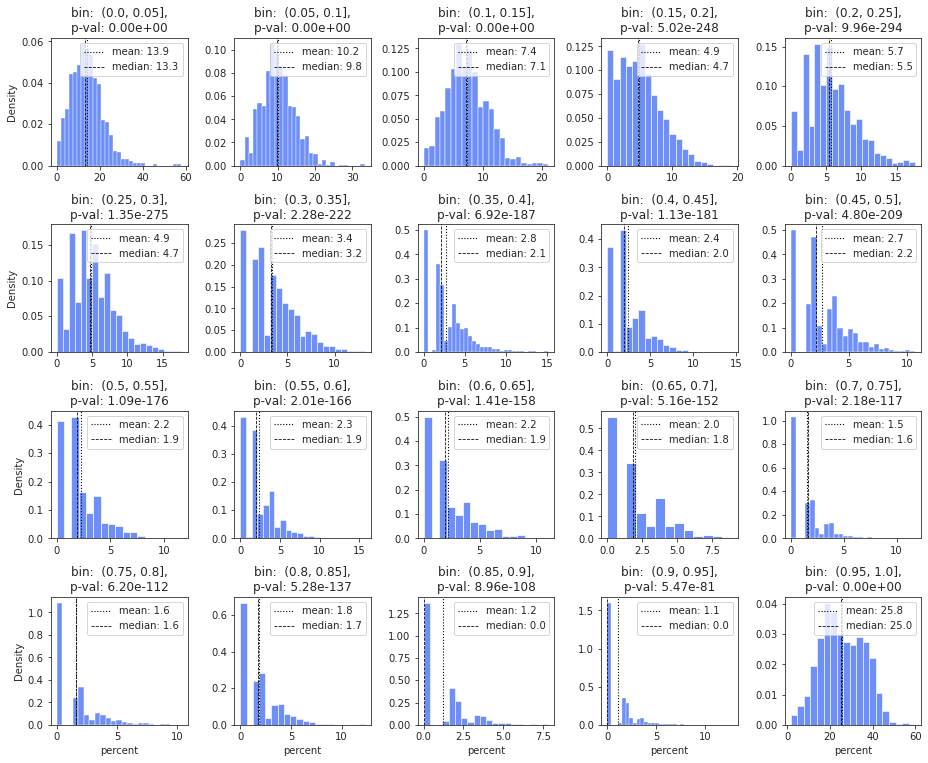

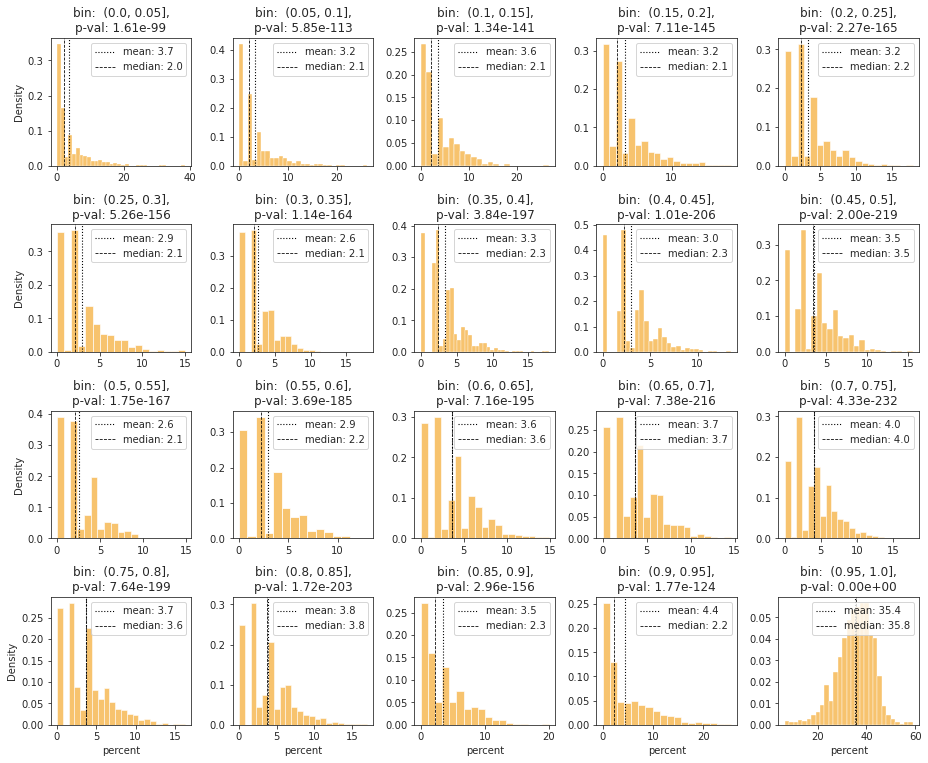

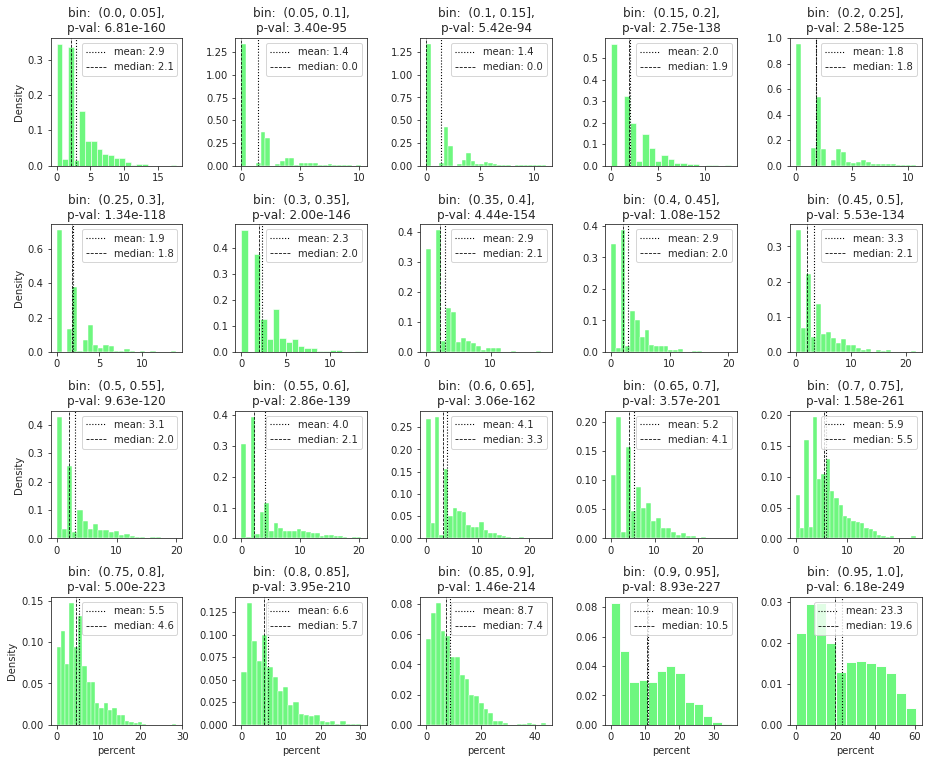

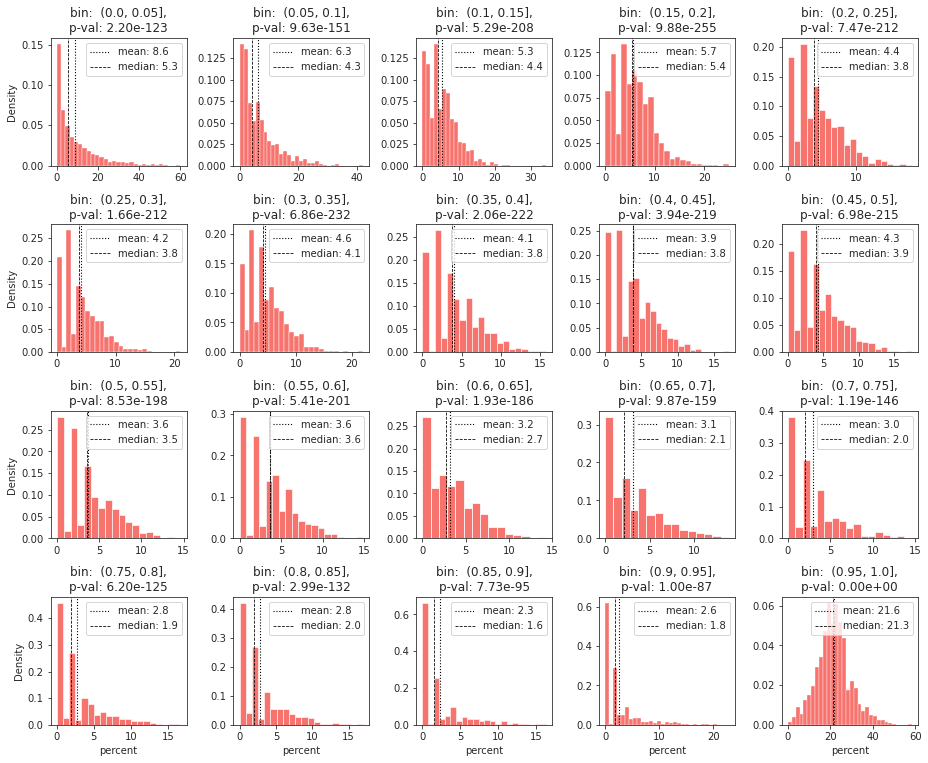

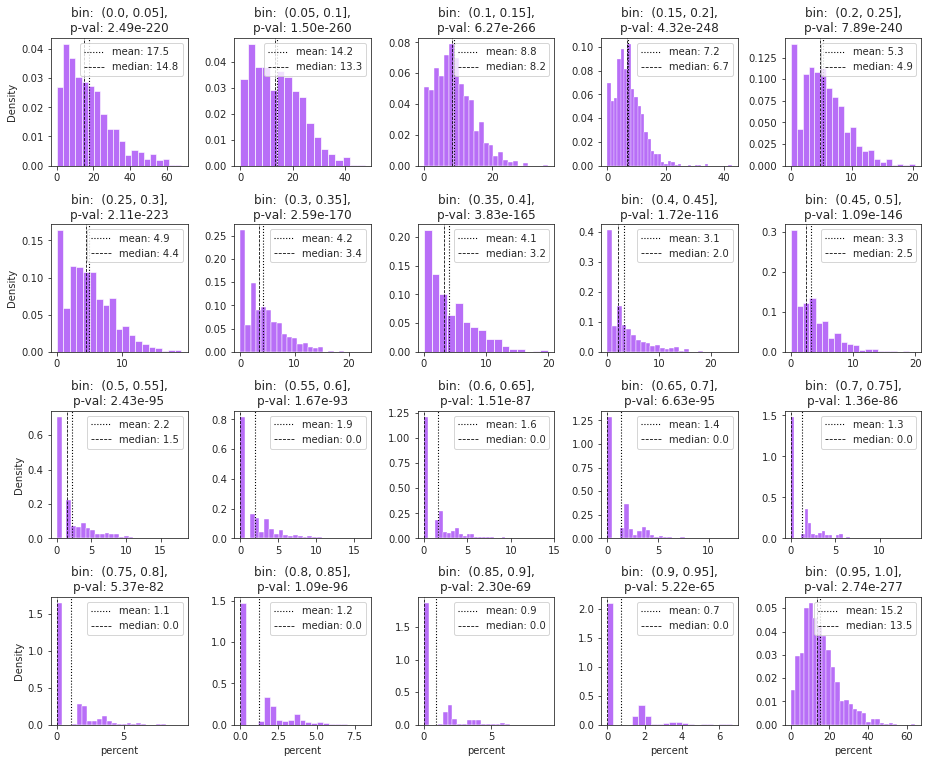

In [17]:
nrows = 4
ncols = int(np.ceil(len(intervals) / nrows))

for oc_idx, color in svinet.colors.items():
    fig, axes = create_figure(nrows, ncols, (13, 10.7), 'ticks', False, False)
    
    for idx, (ax, b) in enumerate(zip(axes.ravel(), intervals)):
        _df = df.loc[
            (df.interval == b) &
            (df.oc_idx == oc_idx)
        ]
        sns.histplot(
            data=_df,
            x='percent',
            stat='density',
            color=color,
            ax=ax,
        )
        _mean = _df.percent.mean()
        _median = _df.percent.median()
        ax.axvline(_mean, ls=':', color='k', label=f"mean: {_mean:.1f}", lw=1.1)
        ax.axvline(_median, ls='--', color='k', label=f"median: {_median:.1f}", lw=0.8)
        ax.legend(loc='upper right')

        if idx % ncols != 0:
            ax.set_ylabel('')
        if idx // ncols < nrows - 1:
            ax.set_xlabel('')

        pval = sp_stats.ttest_1samp(_df.percent, 0, alternative='greater').pvalue
        ax.set_title(f"bin:  {b},\np-val: {pval:1.2e}")

    fig.savefig(pjoin(tmp_dir, f"bin_hist_oc{oc_idx}.pdf"), bbox_inches='tight')
    plt.show()

In [70]:
_dir = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/network/bold_pearson_task-rest_sub-SLC07_ses-1_n128'
os.listdir(_dir)

[
    'graphs_cfg.npy',
    'centralities_cfg.npy',
    'centralities_cfg_cl.npy',
    'adj.npy',
    'centralities.npy',
    'graphs_cfg_cl.npy',
    'graphs.npy'
]

In [74]:
xxx = np.load(pjoin(_dir, 'graphs.npy'), allow_pickle=True).item()

In [75]:
list(xxx)

[62, 20]

In [66]:
net = Network(mice, key).load_network()

In [68]:
net.adjacencies

{
    62: array([[0.        , 0.28531527, 0.08136836, ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.08136836, 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.11462939,
        0.08840876],
       [0.        , 0.        , 0.        , ..., 0.11462939, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08840876, 0.        ,
        0.        ]]),
    29: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
    28: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
    27: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
    26: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
    25: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
    24: array([[0.        , 0.28531527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28531527, 0.        , 0.30218954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30218954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.   

<matplotlib.image.AxesImage object at 0x7f2262b63310>

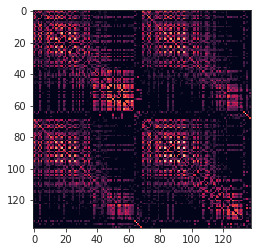

In [20]:
plt.imshow(svinet.adjacencies[svinet.percentiles[0]])

<matplotlib.image.AxesImage object at 0x7f227d133520>

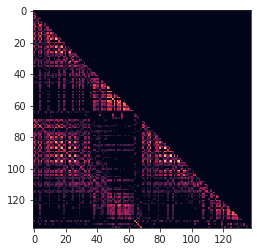

In [22]:
plt.imshow()

In [152]:
lam = np.tril(svinet.adjacencies[svinet.percentiles[0]])

num_draw = 100
rng = get_rng()
pois = rng.poisson(lam=lam.ravel(), size=(num_draw, len(lam.ravel())))
pois = pois.reshape(num_draw, *lam.shape)

In [153]:
pois.shape

(100, 138, 138)

<matplotlib.colorbar.Colorbar object at 0x7f225e498be0>

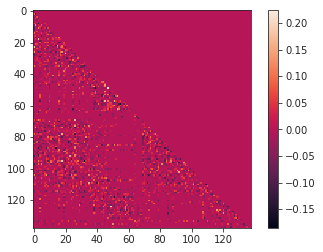

In [154]:
plt.imshow(pois.mean(0) - lam)
plt.colorbar()

In [155]:
i, j = 25, 16
svinet.adjacencies[svinet.percentiles[0]][i, j]

0.4378845673739203

<AxesSubplot:ylabel='Count'>

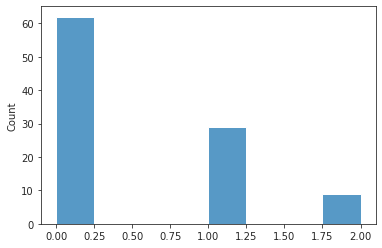

In [156]:
sns.histplot(pois[:, i, j])

<AxesSubplot:ylabel='Count'>

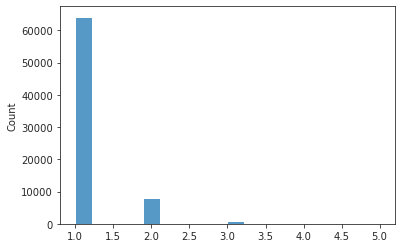

In [157]:
sns.histplot(pois[pois > 0])

In [158]:
pois_count = pois.astype(int)# .astype(bool).astype(int)

In [159]:
pois_count.shape

(100, 138, 138)

<matplotlib.colorbar.Colorbar object at 0x7f2260ff0dc0>

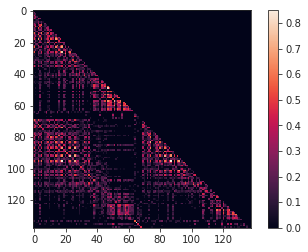

In [160]:
plt.imshow(pois_count.mean(0))
plt.colorbar()

In [161]:
pois_count = pois.astype(int)
pois_sum = pois_count.sum(0)

<matplotlib.colorbar.Colorbar object at 0x7f2262394490>

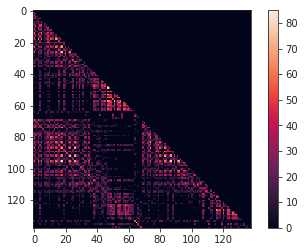

In [162]:
plt.imshow(pois_sum)
plt.colorbar()

In [163]:
tril_ids = np.tril_indices_from(svinet.adjacencies[svinet.percentiles[0]])
x = svinet.adjacencies[svinet.percentiles[0]][tril_ids]

pois_count = pois.astype(int)
pois_sum = pois_count.sum(0)
y = pois_sum[tril_ids]

x.shape, y.shape

((9591,), (9591,))

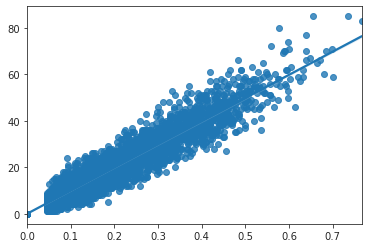

In [164]:
ax = sns.regplot(x=x, y=y)

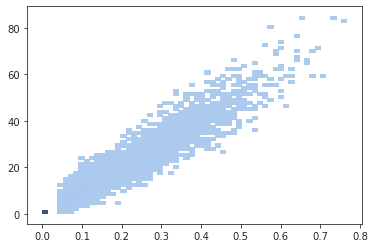

In [165]:
ax = sns.histplot(x=x, y=y)

In [126]:
svinet.thresholds

{
    62: 0.04490062651668549,
    29: 0.15842494135484625,
    28: 0.1647771238059759,
    27: 0.16899147826901534,
    26: 0.17425905680232673,
    25: 0.17974283927477483,
    24: 0.1863952506608605,
    23: 0.19173891801765064,
    22: 0.19851331801478747,
    21: 0.20602455005376077,
    20: 0.21314449638165453
}

In [166]:
a, b = 2.31, 0.627
mean, var, skew, kurt = sp_stats.beta.stats(a, b, moments='mvsk')

In [ ]:
sp_stats.beta

In [167]:
mean, var

(array(0.78651685), array(0.04264874))

<AxesSubplot:ylabel='Count'>

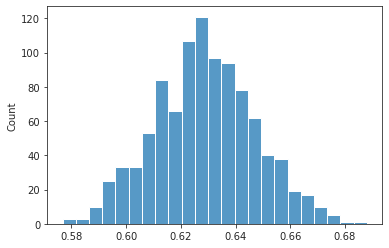

In [181]:
# 342.07256 55.56874
# 801.62555 316.53943
# 325.77537 62.01601
# 1128.24941 154.63773
# 439.27711 260.27260

a = 439.27711
b = 260.27260
s = rng.beta(a, b, size=1000)
sns.histplot(s)

<AxesSubplot:ylabel='Probability'>

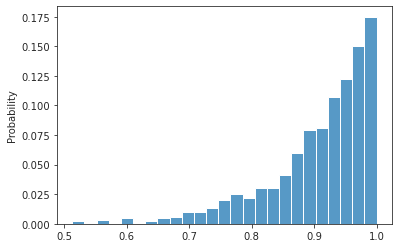

In [209]:
a = 10
b = 1

s = rng.beta(a, b, size=1000)
sns.histplot(s, stat='probability')

[<matplotlib.lines.Line2D object at 0x7f224f9bc190>]

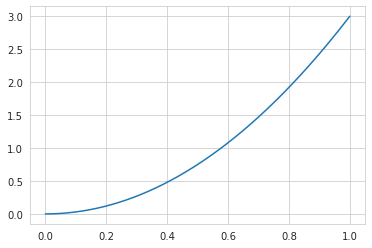

In [244]:
a = 3
b = 1
rv = sp_stats.beta(a, b)
x = np.linspace(0, 1, 1000)
plt.plot(x, rv.pdf(x))

In [245]:
lam = rv.pdf(np.tril(svinet.adjacencies[svinet.percentiles[0]]))

<matplotlib.colorbar.Colorbar object at 0x7f224f9534c0>

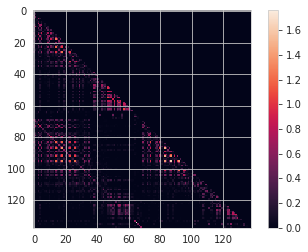

In [246]:
plt.imshow(lam)
plt.colorbar()

In [252]:
num_draw = 100
rng = get_rng()
pois = rng.poisson(lam=lam.ravel() / np.max(lam), size=(num_draw, len(lam.ravel())))
pois = pois.reshape(num_draw, *lam.shape)

In [253]:
tril_ids = np.tril_indices_from(svinet.adjacencies[svinet.percentiles[0]])
x = svinet.adjacencies[svinet.percentiles[0]][tril_ids]

pois_count = pois.astype(int)
pois_sum = pois_count.sum(0)
y = pois_sum[tril_ids]

x.shape, y.shape

((9591,), (9591,))

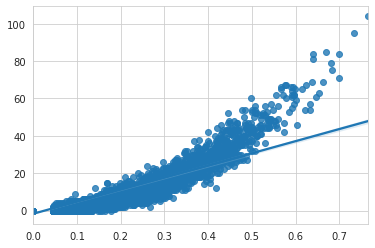

In [254]:
ax = sns.regplot(x=x, y=y)

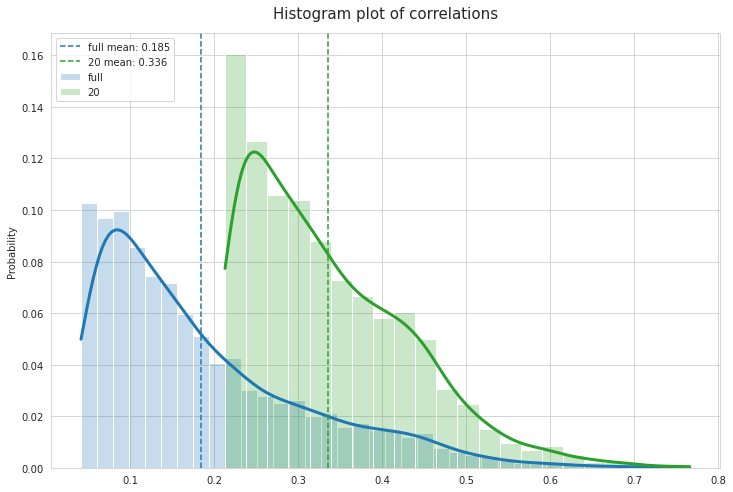

In [250]:
_ = plot_corr_hist([svinet.adj, svinet.adjacencies[20]], ['full', '20'], ['C0', 'C2'], positive_only=True)

In [243]:
svinet.thresholds

{
    62: 0.04490062651668549,
    29: 0.15842494135484625,
    28: 0.1647771238059759,
    27: 0.16899147826901534,
    26: 0.17425905680232673,
    25: 0.17974283927477483,
    24: 0.1863952506608605,
    23: 0.19173891801765064,
    22: 0.19851331801478747,
    21: 0.20602455005376077,
    20: 0.21314449638165453
}

In [188]:
intvl = intervals.values[18]
str(intvl)

'(0.9, 0.95]'

In [189]:
_df = df.loc[
    (df.interval == intvl) &
    (df.oc_idx == oc_idx)
]

In [190]:
_df

,run,oc_idx,count,percent,interval
18,n138-k5-mmsb-seed1-linksampling-p00,1,1,1.666667,"(0.9, 0.95]"
118,n138-k5-mmsb-seed2-linksampling-p00,1,1,1.818182,"(0.9, 0.95]"
218,n138-k5-mmsb-seed3-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"
318,n138-k5-mmsb-seed4-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"
418,n138-k5-mmsb-seed5-linksampling-p00,1,1,1.639344,"(0.9, 0.95]"
...,...,...,...,...,...
982518,n138-k5-mmsb-seed9996-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"
982618,n138-k5-mmsb-seed9997-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"
982718,n138-k5-mmsb-seed9998-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"
982818,n138-k5-mmsb-seed9999-linksampling-p00,1,0,0.000000,"(0.9, 0.95]"


In [191]:
_df.percent.mean(), _df.percent.std()

(0.5344436100761077, 1.028108380993735)

In [185]:
xxx = 0.2 + np.random.randn(100)

In [186]:
sp_stats.ttest_1samp(xxx, 0, alternative='greater')

Ttest_1sampResult(statistic=1.5074300218033376, pvalue=0.06744249270090336)

In [187]:
sp_stats.ttest_1samp(xxx, 0, alternative='two-sided')

Ttest_1sampResult(statistic=1.5074300218033376, pvalue=0.1348849854018067)